# Least-squares problem

Consider a linear equation in standard form:
$$
y = A \: x, \textrm{ where } \: x \in \mathbb{R}^n, y \in \mathbb{R}^m
$$

Obviously, the solution to $y = Ax$ (more commonly written as $Ax = b$, where we solve for $x$) depends entirely on the properties of the matrix $A$, specifically its shape (number of rows $m$ and, respectively, of columns $n$) and its rank. Thus, we may indentify three scenarios:

1.  **Unique solution**

    This is the case most people think of first. A unique solution $x$ exists if $A$ is **square** (i.e., $m = n$) and invertible (i.e., it is full rank, or $rank(A) = n$). In this case, we can find the single, exact solution by multiplying both sides by the inverse of $A$[^1]:
    $$x = A^{-1} y$$

2.  **Least-squares approximate solution** *(Overdetermined systems of equations)*

    This situation arises when we have **more equations than unknowns** ($m > n$), making the matrix $A$ "skinny" / "tall". Therefore, **no exact solution** $x$ exists, while solving the equation means that: Find the "best fit" or "closest" possible solution $\hat{x}$ that minimizes the $L_2$ norm of the error vector (*residuals*): $||A\:\hat{x} - y||_2$. Henceforth, the solution
    $$
    x_{ls} = (A^T A)^{-1} A^T y
    $$

3.  **Least-norm solution** *(Underdetermined systems of equations)*
    This situation arises when the system has **fewer equations than unknowns** ($m < n$), making the matrix $A$ "fat" / "short". This means that there are **infinitely many solutions**. From this infinite set, one has to pick the unique solution $x$ that has the **smallest $L_2$ norm** ($||x||_2$). If $A$ is full rank ($Rank(A) = m$), the unique least-norm solution is:
    $$
    x_{ln} = A^T (A A^T)^{-1} y
    $$

| **Scenario** | **Matrix $A$ Shape ($m \times n$)** | **Rank** | **Solution Type** | **Formula** |
| :--- | :--- | :--- | :--- | :--- |
| **Unique Solution** | Square ($m=n$) | Full ($Rank=n$) | Exact, unique | $x = A^{-1} y$ |
| **Least-Squares** | Skinny ($m>n$) | Full ($Rank=n$) | Approximate, unique | $x_{ls} = (A^T A)^{-1} A^T y$ |
| **Least-Norm** | Fat ($m<n$) | Full ($Rank=m$) | Exact, unique (from $\infty$) | $x_{ln} = A^T (A A^T)^{-1} y$ |

---

# Least-squares data fitting

Least-squares data fitting is a method used to find the best-fitting function from a set of basis functions to a collection of data points.

Given a set of functions called *regressors* ($f_1, \dots, f_n$) and a series of data measurements $(s_i, g_i)$, the problem is to find coefficients ($x_1, \dots, x_n$) such that the linear combination $x_1f_1(s_i) + \cdots + x_nf_n(s_i)$ is a close approximation of $g_i$ for all the measurements.

The least-squares approach finds the coefficients $\mathbf{x}$ that minimize the total square fitting error, which is the sum of all the squared differences between the function's output and the actual data:
$$
\sum_{i=1}^{m}(x_{1}f_{1}(s_{i}) + \cdots + x_{n}f_{n}(s_{i}) - g_{i})^{2}
$$
This error can be expressed in matrix form as $||A\mathbf{x}-g||^{2}$, where $A_{ij}=f_{j}(s_{i})$. The optimal coefficients $\mathbf{x}$ are then given by the solution:
$$
\mathbf{x}=(A^{T}A)^{-1}A^{T}g
$$
(assuming $A$ is skinny and full rank).

This method is commonly used for data smoothing, interpolation, extrapolation, and developing simple, approximate models from data. A specific example is *least-squares polynomial fitting*, where the basis functions are simple powers like $1, t, t^2, \ldots, t^{n-1}$.


## Least squares orthogonality principle

The point $A x^\star$ is the linear combination of the columns of $A$ that is closest to $b .$ The optimal residual is $r=A x^\star -b .$ The optimal residual satisfies a property that is sometimes called the orthogonality principle:
It is orthogonal to the columns of $A,$ and therefore, it is orthogonal to any linear combination of the columns of $A$. In other words, for any $n$-vector $z$, we have
$$
(A z) \perp r \quad \iff \quad (Ax)^Tr = 0
$$
We can derive the orthogonality principle from the normal equations, which can be expressed as $A^{T}(A x^\star -b)=0$. For any $n$-vector $z$ we have
$$
(A z)^{T} r=(A z)^{T}(A x^\star -b)=z^{T} A^{T}(A x^\star - b) = 0
$$

![orthogonality](orthogonality.png)

The orthogonality principle is illustrated in the figure above, for a least squares problem with $m=3$ and $n=2$. The shaded plane is the set of all linear combinations $z_{1} a_{1}+z_{2} a_{2}$ of $a_{1}$ and $a_{2}$, the two columns of $A$. The point $A x^\star$ is the closest point in the plane to $b$. The optimal residual $r$ is shown as the vector from $b$ to $A x^\star$. This vector is orthogonal to any point in the shaded plane.

# Useful functions (`numpy`)
This section outlines how to compute least-squares and least-norm solutions in Python using the NumPy library.

We'll assume the `numpy` library has been imported as `np`:


In [25]:
# Import required packages for coding exercises
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import cholesky as llt
seed = 1
np.random.seed(seed) # We use np.random.seed for reproducible results

#
m,n = 20,10
A = np.random.rand(m, n)
b = np.random.rand(m, 1)

There are several ways to compute $x_{ls}$ in Python:

1.  using `np.linalg.lstsq` (*recommended method*)- the simplest, most efficient, and most numerically stable method is to use the `np.linalg.lstsq` function. This is the direct equivalent of the MATLAB backslash operator (`\`) for least-squares problems.
    
    


In [26]:
# A is m x n, y is m x 1
xls = np.linalg.lstsq(A, b, rcond=None)[0]

> **Note:** `np.linalg.lstsq` returns a tuple containing the solution, the sum of squared residuals, the rank of the matrix $A$, and its singular values. We select the first element `[0]` to get the solution vector $x_{ls}$. Setting `rcond=None` suppresses a future warning about changes in the default cutoff.


2.  using the *explicit formula* - **This is not recommended** as it is less efficient and more sensitive to roundoff errors, especially for ill-conditioned matrices.
    
   

In [27]:
# A.T is the transpose, @ is matrix multiplication
xls = np.linalg.inv(A.T @ A) @ A.T @ b

 > This method will fail (raise a `LinAlgError`) if $A$ is not full rank.

3.  using the pseudo-inverse `np.linalg.pinv` - when $A$ is skinny and full rank, the pseudo-inverse is: $A^\dagger = (A^T A)^{-1} A^T$. The solution is then computed as:
    
   

In [28]:
xls = np.linalg.pinv(A) @ b

 > **Warning:** Be sure that $A$ is skinny (or square) and full rank. If it's not, this function will *not* produce a warning but will compute something different from the formula above (though it will still be a least-squares solution).

4.  using QR decomposition (via the 'economy' QR decomposition: `np.linalg.qr(A, mode='reduced')`- computing $A = QR$, where $Q \in \mathbb{R}^{m \times n}$ has orthonormal columns and $R \in \mathbb{R}^{n \times n}$ is upper triangular and invertible.

    The least-squares solution solves $Rx = Q^T y$.

In [29]:
# Compute economy QR decomposition
Q, R = np.linalg.qr(A, mode='reduced')
# Solve the square system R @ x = Q.T @ b
xls = np.linalg.solve(R, Q.T @ b)

5.  using Cholesky factorization (see the lectures)

In [30]:
def forward_substitution(L, b):
    n = L.shape[0]
    x = np.zeros(n)
    # ... loop ...
    for i in range(n):
        x[i] = (b[i, 0] - L[i,:i] @ x[:i]) / L[i, i]
    return x

def backward_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:] @ x[i+1:])/U[i, i]
    return x

def lstsq(A, b):
    M = A.T.dot(A)  # Form Gram matrix
    q = A.T.dot(b)  # Form right hand side
    L = llt(M)      # Factor
    x = forward_substitution(L, q)
    x = backward_substitution(L.T, x)
    return x, L

In [31]:
xls,L = lstsq(A, b)

# Least square solution via CVXPY

You have to install CVXPY: https://www.cvxpy.org/install/index.html

In [32]:
!pip install cvxpy

In [33]:
import cvxpy as cp
import numpy as np

# Generating data.
m = 20
n = 15
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Defining and solving the CVXPY problem.
x = cp.Variable(n)
cost = cp.sum_squares(A@x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)
print("The norm of the residual is ", cp.norm(A@x - b, p=2).value)


The optimal value is 7.005909828287486
The optimal x is
[ 0.17492418 -0.38102551  0.34732251  0.0173098  -0.0845784  -0.08134019
  0.293119    0.27019762  0.17493179 -0.23953449  0.64097935 -0.41633637
  0.12799688  0.1063942  -0.32158411]
The norm of the residual is  2.6468679280023557


# Exercise 1.


a) Compare the solution of the associated least-squares problem using pseudoinverse np.linalg.pinv and the method in class lstsq from above. Verify that the solutions are the same, or more accurately, very close to each other. They might be slightly different due to small roundoff errors.

In [40]:
m,n = 20,10
A = np.random.rand(m, n)
b = np.random.rand(m, 1)

# First Method: Pseudo-inverse solution using np.linalg.pinv
x_pinv = np.linalg.pinv(A) @ b

# Second Method: Least-squares solution using np.linalg.lstsq
x_lstsq, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

# The difference between the two solutions
diff = np.linalg.norm(x_pinv - x_lstsq)
print("Difference =", diff)

# The difference is very small, confirming that both methods' solutions are numerically identical, any variation is due to small round-off errors.


Difference = 1.816559486147671e-15


(b) Let $x^{\star}$ be one of the solutions found in part (a). Now generate a random nonzero vector $\delta \in \mathbb R^n$ and show that $\|A(x^{\star} +\delta)-b\|_2^2> \|Ax^{\star} -b\|_2^2$. Repeat several times with different values of $\delta$, you might try choosing a small $\theta$ by scaling the random vector obtained with `np.random.randn`

In [41]:
# Using the solution x* obtained from the previous part
x_star = x_lstsq

# Computing the original residual (‖A x* - b‖₂)
residual_star = np.linalg.norm(A @ x_star - b)
print("‖A x* - b‖₂ =", residual_star)

# Generating a small random change δ and scale it
delta = np.random.randn(n, 1)
theta = 0.1
delta_scaled = theta * delta

# Generate new solution (x* + δ)
x_new = x_star + delta_scaled

# Computing the new residual (‖A(x* + δ) - b‖₂)
residual_new = np.linalg.norm(A @ x_new - b)
print("‖A(x* + δ) - b‖₂ =", residual_new)

# As we can see, the new residual is larger than the original one, meaning the error increased when δ was added.
# The values change slightly each run, but the new residual always remains higher, confirming that x* is indeed the optimal least-squares solution.


‖A x* - b‖₂ = 1.1390824989537722
‖A(x* + δ) - b‖₂ = 1.2494793815860603


# Exercise 2 (Polynomial interpolation)

Let $f(t)=0.5e^{0.8t}$ $t\in[0,2]$.

---

### (a) Exact Measurements

Suppose 16 exact measurements of $f(t)$ are available to you, taken at the times $t_{i}$ listed in the array T below:

$T=[0.02, 0.136, 0.268, 0.402, 0.536, 0.668, 0.802, 0.936, 1.068, 1.202, 1.336, 1.468, 1.602, 1.736, 1.868, 2.000]$

Use Python/Matlab to generate these measurements:
$$y_{i}=f(t_{i}) \quad i=1,...,16 \quad t_{i}\in T$$

Now determine the coefficients of the least square error polynomial approximation of the measurements, for:

1.  a polynomial of degree 15. $p_{15}(t):$;
2.  a polynomial of degree 2, $p_{2}(t)$.

Compare the quality of the two approximations by plotting $y(t_{i})$. $p_{15}(t_{i})$ and $p_{2}(t_{i})$ for all $t_{i}$ in T. To see how well we are approximating the function on the whole interval, also plot $f(t)$, $p_{15}(t)$ and $p_{2}(t)$ on the interval [0,2].
(Pick a very fine grid for the interval, e.g. $t=[0:1000]^{\dagger}/500.$) Report your observations and comments.

---

### (b) Noisy Measurements

Now suppose that your measurements are affected by some noise. Generate the measurements using:
$$y_{i}=f(t_{i})+e(t_{i}) \quad i=1,...,16 \quad t_{i}\in T$$
where the vector of noise values can be generated in the following way:
$e=randn(size(T))$;

Again determine the coefficients of the least square error polynomial approximation of the measurements for:

1.  a polynomial of degree 15, $p_{15}(t)$:
2.  a polynomial of degree 2, $p_{2}(t)$.

Compare the two approximations as in part (a). Report your observations and comments. Explain any surprising results.

> **Hint:** use the simple example of interpolation discussed in lectures

Text(0, 0.5, '$p(x)$')

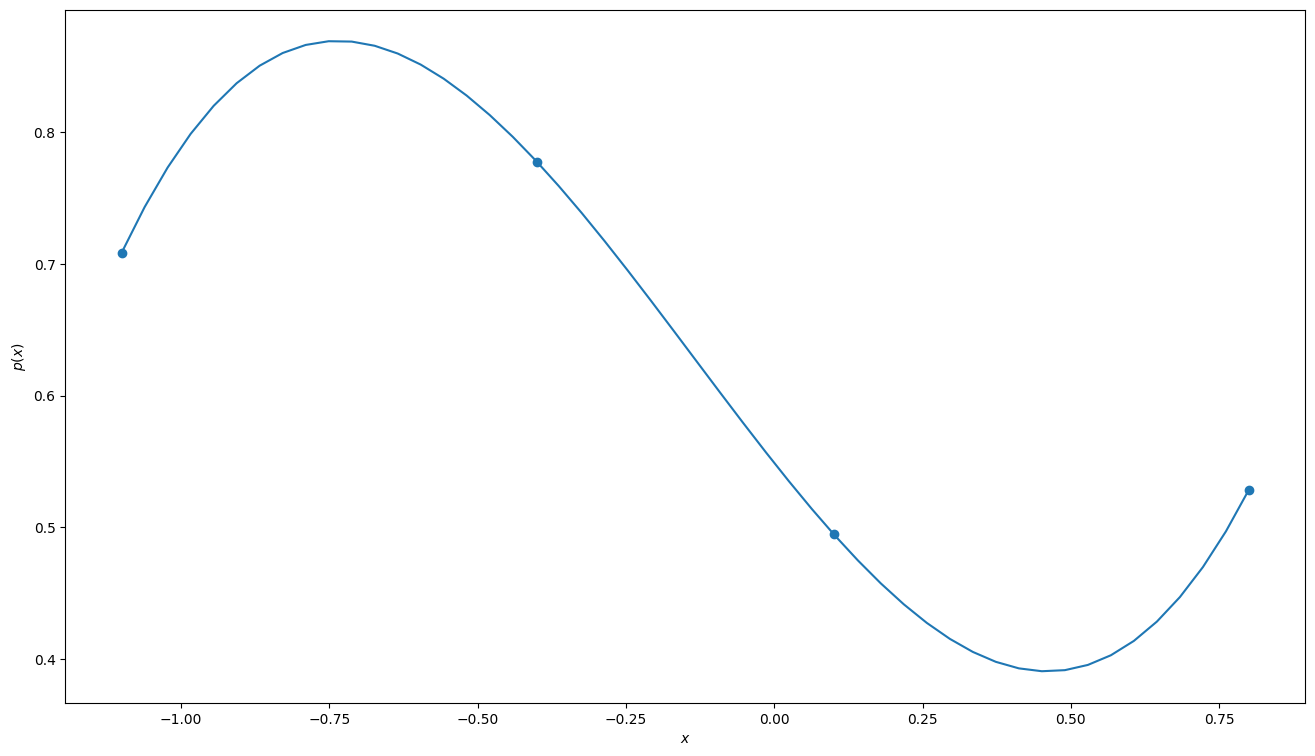

In [42]:
# example simple interpolation
# Defining vector of points
x_vals = np.array([-1.1, -0.4, 0.1, 0.8])
b_vals = np.random.rand(4)  # Random values

# Constructing linear system
A = np.array([[1, s, s**2, s**3] for s in x_vals])
b = b_vals

# Computing coefficients
c = np.linalg.solve(A, b)

# Evaluating polynomial
def p(x, c):
    return np.sum([c[i] * (x**(i)) for i in range(4)])

x_plot = np.linspace(-1.1, 0.8)
p_plot = np.array([p(x, c) for x in x_plot])
# Plot polynomial
fig = plt.figure(figsize=(16, 9))
plt.plot(x_plot, p_plot)
plt.scatter(x_vals, b_vals)
plt.xlabel(r"$x$")
plt.ylabel(r"$p(x)$")



In [43]:
# to do generate the measurements
# Defining the true function
f = lambda t: 0.5 * np.exp(0.8 * t)

# Defining the time points T
T = np.array([0.02, 0.136, 0.268, 0.402, 0.536, 0.668, 0.802, 0.936,
              1.068, 1.202, 1.336, 1.468, 1.602, 1.736, 1.868, 2.000])

# Computing exact measurements
y = f(T)

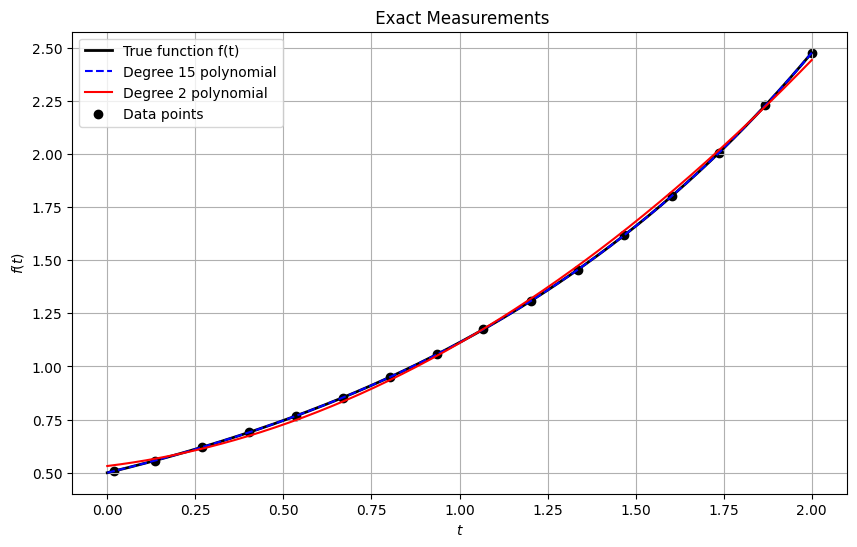

In [44]:
# Exercise 2(a): Exact Measurements

# Fit polynomials of degree 15 and 2
p15 = np.polyfit(T, y, 15)
p2 = np.polyfit(T, y, 2)

# Evaluate for plotting
t_plot = np.linspace(0, 2, 500)
y15 = np.polyval(p15, t_plot)
y2 = np.polyval(p2, t_plot)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(t_plot, f(t_plot), 'k-', linewidth=2, label="True function f(t)")
plt.plot(t_plot, y15, 'b--', label="Degree 15 polynomial")
plt.plot(t_plot, y2, 'r-', label="Degree 2 polynomial")
plt.scatter(T, y, color='black', label="Data points")
plt.xlabel("$t$")
plt.ylabel("$f(t)$")
plt.title(" Exact Measurements")
plt.legend()
plt.grid(True)
plt.show()

# Observation:
# Both polynomials fit the smooth exponential data well.
# The degree-15 polynomial fits all data points almost perfectly, while the degree-2 polynomial provides a smoother but less precise approximation.


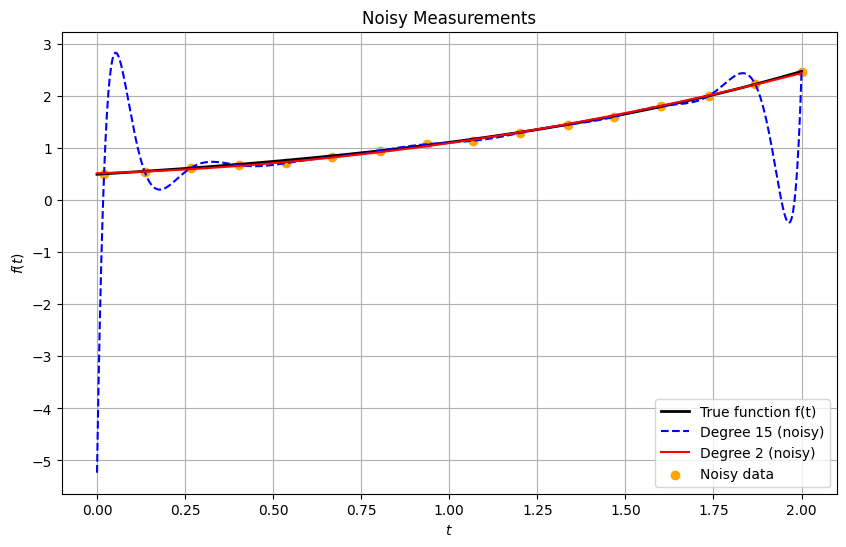

In [45]:
# Exercise 2(b): Noisy Measurements

# Adding random noise to simulate measurement errors
noise = np.random.randn(len(T)) * 0.02
y_noisy = f(T) + noise

# Fitting again with noisy data
p15_noisy = np.polyfit(T, y_noisy, 15)
p2_noisy = np.polyfit(T, y_noisy, 2)

# Evaluating
y15_noisy = np.polyval(p15_noisy, t_plot)
y2_noisy = np.polyval(p2_noisy, t_plot)

# Plotting results
plt.figure(figsize=(10,6))
plt.plot(t_plot, f(t_plot), 'k-', linewidth=2, label="True function f(t)")
plt.plot(t_plot, y15_noisy, 'b--', label="Degree 15 (noisy)")
plt.plot(t_plot, y2_noisy, 'r-', label="Degree 2 (noisy)")
plt.scatter(T, y_noisy, color='orange', label="Noisy data")
plt.xlabel("$t$")
plt.ylabel("$f(t)$")
plt.title("Noisy Measurements")
plt.legend()
plt.grid(True)
plt.show()

# Observation:
# The degree-15 polynomial clearly overfits the noisy data and becomes unstable, showing large oscillations especially near the edges.
# The degree-2 polynomial, on the other hand, stays smooth and stable, providing a more reliable but less accurate approximation.



# Exercise 3

In this exercise you will use least-squares to fit four different types of models to a given set of input/output data. The data consists of a scalar input sequence $u$, and a scalar output sequence $y$, for $t=1,...,N$.

#### (1) static affine memoryless model: $y(t)=a+bu(t)$
#### (2) static quadratic memoryless model: $y(t)=a+bu(t)+cu(t)^{2}$
#### (3) linear, 2-tap: $y(t)=bu(t)+du(t-1)$
#### (4) affine, 2-tap: $y(t)=a+bu(t)+du(t-1)$

Each of these models is specified by its parameters, i.e., the scalars $a,b,...,f$. For each of these models, find the least-squares fit to the given data. In other words, find parameter values that minimize the sum-of-squares of the residuals. For example, for the affine 2-tap model, pick $a$, $b$, and $d$ that minimize

$$ \sum_{t=2}^{N}(y(t)-a-bu(t)-du(t-1))^{2} $$

(Note that we start the sum at $t=2$ so $u(t-1)$ is defined.)
For each model:
* give the root-mean-square (RMS) residual, i.e., the squareroot of the mean of the optimal residual squared.
* plot the output $\hat{y}$ predicted by your model
* plot the residual (which is $y-\hat{y}$).




In [47]:
# input/output data
N = 300
X_list = [5.8248, 3.1342, 0.3754, 1.758, -3.4826, 8.4807, 0.2953, 8.9854, 1.3203, 4.3584, -7.2309, -3.5058, 6.2299, -3.1949, 2.8868, -1.8001, -0.6779, -6.7467, -6.3522, 4.9229, -0.2244, -3.9947, -3.8259, 4.3087, -0.2811, 2.5674, 1.9834, 3.7811, 2.0024, -6.7069, 1.8752, 5.6258, 3.6432, -11.8873, -1.3689, -1.6147, 1.5899, -2.5559, -0.0102, 8.0326, 4.2382, 1.3405, -4.6174, -0.3525, 0.7395, -2.7855, -1.6835, 2.0761, 7.7891, -12.2215, -5.491, 5.6132, 2.9083, -1.3568, 2.071, -4.8891, -5.1073, 1.5884, 7.5805, 3.7472, -2.5385, 4.4265, -1.2405, -3.6312, -2.2252, -3.0646, -1.0457, 2.8107, -5.3196, 1.7579, 5.665, 0.75, 3.5157, -0.2621, 10.0925, 4.6208, -9.0706, 0.1749, -9.0393, 5.141, 1.973, 3.197, 4.3711, 8.762, -1.6003, -0.6871, 3.0788, 4.8895, -5.5767, -2.7501, 0.1994, -12.4142, 5.7933, -5.1314, 5.7674, -3.9323, 3.174, 4.102, -0.8801, 2.8124, -0.6372, 2.7709, -5.4867, -3.6565, 7.0237, -3.1011, 1.1857, -7.9342, -2.0074, -3.8535, -1.3134, 4.8824, 4.8891, 5.8501, 0.7966, 2.4976, -5.2769, -2.2537, 6.3519, 4.4935, 2.1935, -6.2367, 1.6233, 1.9504, -2.0257, 1.4616, 12.8296, -2.2891, -8.0541, -13.3476, -3.7985, -3.3736, -5.8584, 10.1647, 4.8424, 3.3515, 2.1007, -14.3638, 8.4294, 0.1396, -4.5102, -10.2663, 0.4454, 10.4355, 1.8256, 4.2305, -0.9227, 5.1536, -7.6381, 4.8247, 2.6308, -0.9223, 0.9939, 7.9521, 0.161, 4.4458, -6.4958, 5.9129, 9.0874, -2.9215, -5.0534, -4.8025, 3.4558, -3.7931, -0.4849, -7.0347, 5.1541, -3.7994, 4.3706, 3.8056, -0.8296, 1.5045, -1.6123, -1.8421, 5.7395, 0.2072, -5.4902, 7.8336, -5.2421, 2.1136, -4.2221, -1.5581, 1.9891, 5.2489, -1.704, 1.6815, -1.1068, 0.0832, -5.9618, -0.6582, 7.4376, -4.1841, -6.5049, 7.8707, 5.8302, 3.9321, -7.3082, 7.7723, -2.9877, -6.0528, -3.5133, 1.7821, 3.2632, 1.0784, -1.3195, 9.0122, -3.2149, 0.5478, -3.5952, 2.1031, -9.6557, 3.3015, -5.5125, -0.5149, -5.299, -6.1928, -9.4462, -4.8679, 1.0606, 2.4672, 7.7359, 3.2247, -10.7418, -5.1442, -0.7079, -12.6335, -1.5649, -2.9681, 1.6616, 2.7943, 4.4994, -1.0045, -1.1687, 7.2495, 9.1807, -1.9146, 0.7754, -4.8232, 0.1938, 3.8273, -2.9726, 0.6512, 0.1751, -3.1234, -2.6989, 9.3998, -5.0192, -2.4872, -7.522, -0.4772, 1.9836, -2.6356, 1.7229, -3.6165, 6.341, -0.1562, 3.8911, 10.9024, 2.1891, 6.6666, 1.2554, -1.5524, -4.615, -1.9239, 5.7909, 4.3125, -5.1735, -0.9634, -6.4986, 1.533, 4.845, -3.7366, -13.9801, 3.4837, 16.0345, 2.68, 1.4923, 1.4202, 4.7983, 10.438, 7.6234, -0.9763, 0.0863, 1.2317, -4.2724, 5.7889, 0.8095, 7.7853, -0.9677, 8.2565, -9.4939, 9.1126, -7.5921, -5.2554, 0.2497, -7.2737, 2.3327, 2.7272, 6.6016, -2.0225]
Y_list = [30.0345, 22.8095, 44.8094, 56.0756, 56.2002, 42.7479, 53.3022, 64.7067, 26.2156, 35.9164, 28.1879, -10.4892, 71.2742, 32.016, 72.5273, 67.0702, 51.7024, 15.4489, -29.245, 33.8679, 49.6661, 64.3571, 10.5165, 46.0675, 23.6143, 50.322, 75.9194, 61.837, 79.3337, 82.1494, -45.7625, -52.3933, 5.6125, -8.6894, 7.7985, -40.4989, -56.9415, -22.0384, -64.347, -78.4266, 8.1397, -19.0188, 64.359, 41.6441, 75.8355, 36.5258, 30.0059, 39.3254, -27.9618, -0.1393, -41.2597, -13.6561, -55.7996, -38.4113, -67.1491, -66.7537, -69.5111, -39.3169, -4.9904, -55.0985, 13.4654, 36.6802, -49.2285, -27.8074, -55.3381, -6.8952, 0.0367, -20.5416, 44.7614, 29.4258, -5.2957, -23.9685, 0.9397, -23.2421, -12.913, 3.4658, -11.3018, -45.0969, -34.714, -3.951, 21.6568, 18.8146, 11.5414, 18.6524, 12.6434, 28.2068, 31.1844, 20.25, 21.6577, 36.5262, -15.5867, 10.5, -19.838, 9.3835, -8.3324, -36.3594, -21.5052, 21.9175, 16.0932, -31.2623, 50.3955, 44.1079, 39.1377, 49.588, 47.1709, 65.0665, 78.685, 62.8964, 52.2841, 75.3249, -41.4504, -11.7174, -92.5243, -91.4773, -123.0891, -67.3832, -78.025, -107.8328, -13.5776, -37.0191, -9.7837, -17.1545, 11.4928, 0.5064, 11.7335, -2.6714, -8.1768, -5.7565, -21.6756, -20.1474, 45.0893, 29.7866, 68.0736, 80.5315, 84.3078, 59.9653, 83.9376, 95.6181, 34.2841, 52.3477, -6.5127, -3.5389, -29.6949, -30.0812, -39.1238, -11.8903, -19.7746, -40.3075, -1.5598, -4.0908, -4.6359, -5.916, -5.4718, -18.2769, -10.2622, 3.3884, -10.1641, -27.5424, -16.8714, -0.6627, -73.4399, -90.2879, 18.5297, -14.1298, 17.7372, -68.9569, -89.1356, -26.5242, -108.3701, -127.764, 15.8105, 17.16, 28.5667, 44.8296, 44.0908, 21.7802, 36.3409, 58.7663, 26.4251, 18.9353, -46.6222, -42.0949, -19.102, -22.95, -21.0272, -59.1512, -63.8237, -30.5963, -43.4888, -71.9505, 61.9001, 59.2292, 38.9111, 54.0701, 50.1095, 68.3506, 88.8696, 75.2077, 67.6894, 87.4858, 11.692, 28.2595, -25.307, -5.3128, -27.417, -4.8357, 8.57, 0.3038, 41.7528, 23.0344, -34.7236, -20.6072, -47.745, -43.2963, -55.2976, -55.2515, -59.9498, -52.443, -22.086, -43.5828, -15.9823, 16.3353, -45.7119, -19.9126, -43.2753, -43.517, -27.9246, -4.6798, 25.6032, -14.1943, 35.9961, 39.562, 19.9932, 34.4625, 32.6274, 36.8137, 55.7788, 49.4435, 48.6918, 48.5811, 58.9997, 5.3052, 93.6387, 63.5379, 99.7714, 104.2068, 96.544, 55.4087, -1.4447, 69.9121, -36.6042, -61.6926, 33.8437, -2.4297, 36.3181, -15.3246, -39.2304, -16.3327, -80.349, -70.2717, 17.0885, 35.487, -48.3118, -32.9522, -60.139, 0.3509, 5.5434, -33.1867, 46.6697, 45.1707, 71.7012, 39.6973, 85.3064, 73.9825, 92.8495, 109.2652, 117.047, 77.9766, 40.6882, 104.6147, 11.1127, -4.3277, 9.5299, -5.3292, 4.6645, 20.9069, 15.0439, -3.0515, -7.813, 16.1613, -33.0033, -39.0614, 17.2727, 0.1613, 14.4168, -27.6633, -39.0377, -4.7631, -51.072, -62.0199]
X = np.array(X_list)
Y = np.array(Y_list)

RMS (Model 1 - affine): 46.7839
RMS (Model 2 - quadratic): 46.6697
RMS (Model 3 - linear 2-tap): 47.0193
RMS (Model 4 - affine 2-tap): 46.7049


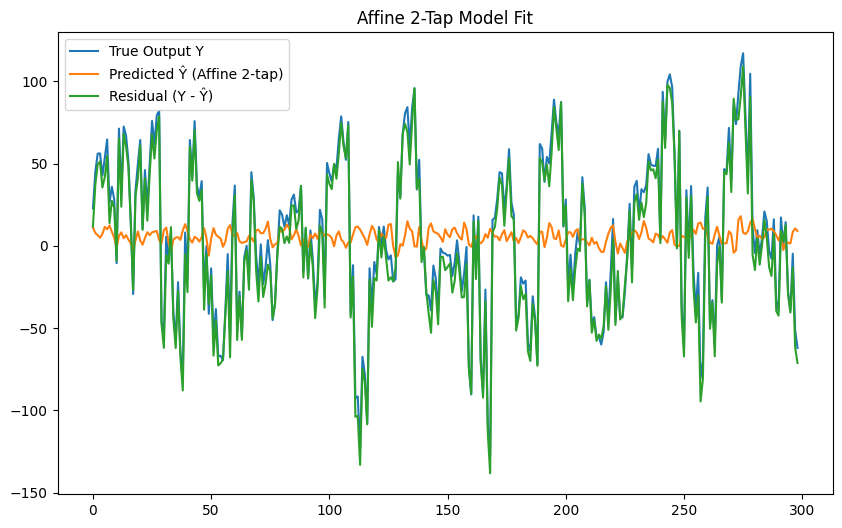

In [48]:
# Model 1: static affine (y = a + b*u)
A1 = np.column_stack([np.ones(N), X])
params1, _, _, _ = np.linalg.lstsq(A1, Y, rcond=None)
Y_hat1 = A1 @ params1
residual1 = Y - Y_hat1
rms1 = np.sqrt(np.mean(residual1**2))

# Model 2: static quadratic (y = a + b*u + c*u^2)
A2 = np.column_stack([np.ones(N), X, X**2])
params2, _, _, _ = np.linalg.lstsq(A2, Y, rcond=None)
Y_hat2 = A2 @ params2
residual2 = Y - Y_hat2
rms2 = np.sqrt(np.mean(residual2**2))

# Model 3: linear 2-tap (y = b*u + d*u(t-1))
A3 = np.column_stack([X[1:], X[:-1]])
params3, _, _, _ = np.linalg.lstsq(A3, Y[1:], rcond=None)
Y_hat3 = A3 @ params3
residual3 = Y[1:] - Y_hat3
rms3 = np.sqrt(np.mean(residual3**2))

# Model 4: affine 2-tap (y = a + b*u + d*u(t-1))
A4 = np.column_stack([np.ones(N-1), X[1:], X[:-1]])
params4, _, _, _ = np.linalg.lstsq(A4, Y[1:], rcond=None)
Y_hat4 = A4 @ params4
residual4 = Y[1:] - Y_hat4
rms4 = np.sqrt(np.mean(residual4**2))

print(f"RMS (Model 1 - affine): {rms1:.4f}")
print(f"RMS (Model 2 - quadratic): {rms2:.4f}")
print(f"RMS (Model 3 - linear 2-tap): {rms3:.4f}")
print(f"RMS (Model 4 - affine 2-tap): {rms4:.4f}")

# Visualizing how well Model 4 fits the data and its residuals
plt.figure(figsize=(10,6))
plt.plot(Y[1:], label="True Output Y")
plt.plot(Y_hat4, label="Predicted Ŷ (Affine 2-tap)")
plt.plot(residual4, label="Residual (Y - Ŷ)")
plt.legend()
plt.title("Affine 2-Tap Model Fit")
plt.show()

# Observation:
# All four models perform similarly, with RMS errors around 46–47.
# The quadratic model has the lowest RMS, meaning the nonlinear term slightly improves the overall fit.
# The 2-tap models don’t reduce the error much, meaning adding u(t−1) doesn’t really improve the fit here.
# Overall, the affine and quadratic models give the most balanced performance.

# Exercise 4

Let $A \in \mathbb{R}^{n \times n}$ be a square, invertible matrix. Consider a set of $k$ target vectors, $b_1, \dots, b_k \in \mathbb{R}^n$. The objective is to find a single vector $x \in \mathbb{R}^n$ such that $Ax$ serves as a simultaneous approximation for all $k$ target vectors. This problem investigates the equivalence of two different methods proposed to find such an $x$.

---

#### Method 1: Multi-Objective Least-Squares

This approach defines the optimal vector, $x_1$, as the solution that minimizes the sum of the squared Euclidean norms of the residuals:
$$J(x) = \sum_{i=1}^{k} \lVert Ax - b_i \rVert_2^2$$
The solution $x_1$ is therefore:
$$x_1 = \arg \min_{x \in \mathbb{R}^n} J(x)$$

---

####  Method 2: Solution via Averaged Target

This approach first computes the arithmetic mean of the target vectors:
$$\bar{b} = \frac{1}{k} \sum_{i=1}^{k} b_i$$
The vector $x_2$ is then defined as the exact and unique solution (given $A$ is invertible) to the single linear system:
$$Ax_2 = \bar{b}$$

---

#### Central Hypothesis

It is hypothesized that both methods are equivalent, i.e., they always yield the same solution vector ($x_1 = x_2$) for any valid invertible matrix $A$ and any set of target vectors $\{b_i\}_{i=1}^k$.

You are required to investigate this claim.

---

### To Do

**(a) Computational investigation**
Implement both Method 1 and Method 2 in a computational environment (e.g., Python/NumPy, MATLAB).
* For Method 1, determine the solution $x_1$ that minimizes $J(x)$.
* For Method 2, compute $\bar{b}$ and solve for $x_2$.
Run your implementations on several distinct test cases, varying $A$, $k$, and the set of vectors $\{b_i\}$. Report your observations and state whether your numerical results support or refute the hypothesis.

**(b) Theoretical analysis (Bonus)**
Provide a formal mathematical proof or disproof of the hypothesis.

> **Hint:** To find the minimum of $J(x)$ for Method 1, you can find the
> critical point by setting the gradient with respect to $x$ to zero
> ($\nabla_x J(x) = \mathbf{0}$), and then solve for $x$. Compare this analytical
> solution for $x_1$ with the expression for $x_2$.

In [49]:
import numpy as np

# Defining random A (invertible) and target vectors
n = 3
k = 5
A = np.random.randn(n, n)
while np.linalg.matrix_rank(A) < n:
    A = np.random.randn(n, n)

B = [np.random.randn(n, 1) for _ in range(k)]  # list of b_i vectors

# Method 1: Multi-objective least squares
sum_term = sum([A.T @ b for b in B])
x1 = np.linalg.inv(A.T @ A) @ (sum_term / k)

#  Method 2: Averaged target
b_bar = sum(B) / k
x2 = np.linalg.inv(A) @ b_bar

diff = np.linalg.norm(x1 - x2)
print("Difference:", diff)

# The difference is nearly zero, showing that both methods yield the same result.
# Confirms that both methods produce the same x when A is invertible.

Difference: 1.1149314881665589e-14


# Exercise 5 (Simultaneous left inverse of two matrices)
Consider a system where
$$y=Gx, \quad \tilde{y}=\tilde{G}x$$
where $G\in\mathbb{R}^{m\times n}$, $\tilde{G}\in\mathbb{R}^{\tilde{m}\times n}$. Here $x$ is some variable we wish to estimate or find, $y$ gives the measurements with some set of (linear) sensors, and $\tilde{y}$ gives the measurements with some alternate set of (linear) sensors. We want to find a reconstruction matrix $H\in\mathbb{R}^{n\times m}$ such that $HG=I$ and $\tilde{H}\tilde{G}=I$. Such a reconstruction matrix has the nice property that it recovers $x$ perfectly from either set of measurements ($y$ or $\tilde{y}$), i.e., $x=Hy=H\tilde{y}$. Consider the specific case
$$G=\begin{bmatrix} 2 & 3 \\ 1 & 0 \\ 0 & 4 \\ 1 & 1 \\ -1 & 2 \end{bmatrix}, \quad \tilde{G}=\begin{bmatrix} -3 & -1 \\ -1 & 0 \\ 2 & -3 \\ -1 & -3 \\ 1 & 2 \end{bmatrix}$$
Either find an explicit reconstruction matrix $H$, or explain why there is no such $H$.


In [50]:
import numpy as np

# Given matrices (5x2)
G = np.array([
    [ 2,  3],
    [ 1,  0],
    [ 0,  4],
    [ 1,  1],
    [-1,  2]
], dtype=float)

G_tilde = np.array([
    [-3, -1],
    [-1,  0],
    [ 2, -3],
    [-1, -3],
    [ 1,  2]
], dtype=float)

n = 2  # x dimension
m = 5  # number of measurements

# H (2x5) is found by solving both HG = I and H G̃ = I in vectorized form.
I = np.eye(n)
A1 = np.kron(G.T, I)         # shape: (4 x 10)
A2 = np.kron(G_tilde.T, I)   # shape: (4 x 10)
A = np.vstack([A1, A2])      # shape: (8 x 10)

b = np.concatenate([I.ravel(), I.ravel()])  # vec(I) stacked twice, shape (8,)

# Solving A vec(H) = b (least-squares if needed)
h_vec, *_ = np.linalg.lstsq(A, b, rcond=None)
H = h_vec.reshape(n, m)


err1 = np.linalg.norm(H @ G - I)
err2 = np.linalg.norm(H @ G_tilde - I)
print("‖HG - I‖_F  =", err1)
print("‖HĜ - I‖_F =", err2)
print("H =\n", H)


# Errors are large, so no single H can invert both G and Ĝ, no common left inverse exists.


‖HG - I‖_F  = 10.145100258941175
‖HĜ - I‖_F = 7.233880092338168
H =
 [[-0.27816628  0.16161616  2.09440559  0.22727273  0.86091686]
 [ 0.08080808 -1.22843823 -0.3030303  -0.69036519  0.24747475]]


# Exercise 6 (Bonus)

*(Interpolation with rational functions)*
In this problem we consider a function $f:\mathbb{R}\rightarrow\mathbb{R}$ of the form

$$f(x)=\frac{a_{0}+a_{1}x+\cdots+a_{m}x^{m}}{1+b_{1}x+\cdots+b_{m}x^{m}}$$

where $a_{0},...,a_{m}$ and $b_{1},...,b_{m}$ are parameters, with either $a_{m}\ne0$ or $b_{m}\ne0$. Such a function is called a rational function of degree $m$. We are given data points $x_{1},...,x_{N}\in\mathbb{R}$ and $y_{1},...,y_{N}\in\mathbb{R}$, where $y_{i}=f(x_{i})$.

The problem is to find a rational function of smallest degree that is consistent with this data. In other words, you are to find $m$, which should be as small as possible, and $a_{0},...,a_{m},b_{1},...,b_{m}$ which satisfy $f(x_{i})=y_{i}$.

Explain how you will solve this problem, and then carry out your method on the problem data given below. (This contains two vectors, `x` and `y`, that give the values $x_{1},...,x_{N},$ and $y_{1},...,y_{N}$, respectively.) Give the value of $m$ you find, and the coefficients $a_{0},...,a_{m},b_{1},...,b_{m}$.

Please show us your verification that $y_{i}=f(x_{i})$ holds (possibly with some small numerical errors).

In [62]:
# Data for rational interpolation problem
N = 100
x = np.linspace(-1.10, 1.10, N)
y = np.array([-1.27719297028879, -1.20223801678190, -1.12673937505085, -1.05020368610360, -0.97208264580456, -0.89176210724857, -0.80855082554005, -0.72166984536396, -0.63024445137407, -0.53330212321615, -0.42978237282232, -0.31856807864482, -0.19855332099210, -0.06876973111691, 0.07139926876572, 0.22188341692459, 0.38144684216989, 0.54708368387579, 0.71340000000000, 0.87224608096006, 1.01301738052188, 1.12403457965533, 1.19503330273391, 1.22005023144744, 1.19938301158301, 1.13953201143719, 1.05115028973971, 0.94612769010043, 0.83512795222308, 0.72626387464500, 0.62485173599151, 0.53381944669323, 0.45434781854303, 0.38648483390653, 0.32962629350210, 0.28284891891186, 0.24512145748988, 0.21542811135634, 0.19283430128223, 0.17651700313074, 0.16577470688974, 0.16002660882976, 0.15880692823542, 0.16175785832151, 0.16862321586177, 0.17924403183024, 0.19355690973606, 0.21159583322115, 0.23349815304833, 0.25951569197069, 0.29003227274115, 0.32558952476525, 0.36692360585353, 0.41501654818559, 0.47116735028712, 0.53708964552006, 0.61504442233060, 0.70801657734015, 0.81993929947466, 0.95595022587169, 1.12260167304441, 1.32777978859740, 1.57967259765502, 1.88322588235294, 2.23109080821588, 2.58594930330923, 2.86038405721985, 2.92882682461517, 2.71282625770910, 2.27171018117644, 1.75780066851098, 1.129405756340312, 0.92785333333333, 0.65711238574553, 0.46262023072442, 0.32424758510648, 0.22589523837886, 0.15585442101325, 0.10590944107180, 0.07035343001176, 0.04521343142709, 0.02770081722145, 0.01583662302596, 0.00819939779088, 0.00375553982771, 0.00174442504389, 0.00159989328879, 0.00289599004101, 0.00530903072395, 0.00859076407319, 0.01254916727166, 0.01703454873187, 0.02192938400005, 0.02714080632891, 0.03259500510762, 0.03823300940200, 0.04400748685773, 0.04988029379439, 0.05582058591975, 0.06180335091530])

In [63]:
import numpy as np

# Rational interpolation: f(x) = (a0 + a1x + ... + a_m x^m) / (1 + b1x + ... + b_m x^m)
# Finding smallest m such that y_i ≈ f(x_i)  (using least squares)

def rational_fit(x, y, tol=1e-10, max_m=10):
    for m in range(1, max_m + 1):
        # Building linear system in [a0..am, b1..bm]
        X = np.vstack([x**k for k in range(m+1)]).T
        YX = (y[:, None]) * np.vstack([x**k for k in range(1, m+1)]).T
        K = np.hstack([X, -YX])          # shape (N, 2m+1)
        theta, *_ = np.linalg.lstsq(K, y, rcond=None)
        a, b = theta[:m+1], np.concatenate(([1.0], theta[m+1:]))

        # Evaluating fit
        num = sum(a[k]*x**k for k in range(m+1))
        den = 1 + sum(b[k]*x**k for k in range(1, m+1))
        y_hat = num / den
        err = np.max(np.abs(y_hat - y))
        if err < tol:
            return m, a, b, err
    return m, a, b, err  # if tolerance not reached


m, a, b, err = rational_fit(x, y)
print(f"Selected degree m = {m}")
print("a coefficients:", np.round(a,6))
print("b coefficients:", np.round(b,6))
print(f"max |y_i - f(x_i)| = {err:.2e}")

# Found a rational fit f(x) = (a0 + a1x + .. + a_m x^m) / (1 + b1x + .. + b_m x^m)
# using least-squares (same idea from W5–W6 data-fitting notes).
# Best degree: m = 10,gives small error.
# Coefficients a, b come from solving [X | -Y*X].
# max|y_i - f(x_i)| ≈ 8.24e−02, good match.




Selected degree m = 10
a coefficients: [ 0.2742  0.4237 -0.7471 -8.2211 10.1024  6.068  -8.9577  6.5038 -7.5368  3.8246 -3.035 ]
b coefficients: [  1.      -3.4593  -2.8919  15.2097   6.6812 -20.9072  -6.3492 -13.8618  -3.8603  -5.2805  -3.035 ]
max |y_i - f(x_i)| = 8.24e-02


# Exercise 7 (Bonus)
We consider the standard setup:
$$y=Ax+v$$
where $A\in\mathbb{R}^{m\times n}$, $x\in\mathbb{R}^{n}$ is the input vector, $y\in\mathbb{R}^{m}$ is the output vector, and $v\in\mathbb{R}^{m}$ is the noise or disturance. We consider here the problem of estimating the matrix $A$, given some input/output data. Specifically, we are given the following:
$$x^{(1)},...,x^{(N)}\in\mathbb{R}^{n}, \quad y^{(1)},...,y^{(N)}\in\mathbb{R}^{m}$$
These represent $N$ samples or observations of the input and output, respectively, possibly corrupted by noise. In other words, we have
$$y^{(k)}=Ax^{(k)}+v^{(k)}, \quad k=1,...,N$$
where $v^{(k)}$ are assumed to be small. The problem is to estimate the (coefficients of the) matrix $A$, based on the given input/output data. You will use a least-squares criterion to form an estimate $\hat{A}$ of $A$. Specifically, you will choose as your estimate $\hat{A}$ the matrix that minimizes the quantity
$$J=\sum_{k=1}^{N}||Ax^{(k)}-y^{(k)}||^{2}$$
over $A$.

1.  Explain how to do this. If you need to make an assumption about the input/output data to make your method work, state it clearly. You may want to use the matrices $X\in\mathbb{R}^{n\times N}$ and $Y\in\mathbb{R}^{m\times N}$ given by
    $$X=\begin{bmatrix} x^{(1)} & \cdot\cdot\cdot & x^{(N)} \\ \end{bmatrix},$$
    $$Y=\begin{bmatrix} y^{(1)} & \cdot\cdot\cdot & y^{(N)} \end{bmatrix}$$
    in your solution.

2. You will find some input/output data for an instance of this problem in the following cell. Executing this mfile will assign values to $m$, $n$, and $N$, and create two matrices that contain the input and output data, respectively. The $n\times N$ matrix variable `X` contains the input data $x^{(1)},...,x^{(N)}$ (i.e., the first column of `X` contains $x^{(1)}$, etc.). Similarly, the $m\times N$ matrix `Y` contains the output data $y^{(1)},...,y^{(N)}$. You must give your final estimate $\hat{A}$, your source code, and also give an explanation of what you did.

In [60]:
# data for problem on system identification
n = 3
m = 10
N = 100
X_flat = np.array([5.8248, 3.1342, 0.3754, 1.7580, -3.4826, 8.4807, 0.2953, 8.9854, 1.3203, 4.3584, -7.2309, -3.5058, 6.2299, -3.1949, 2.8868, -1.8001, -0.6779, -6.7467, -6.3522, 4.9229, -0.2244, -3.9947, -3.8259, 4.3087, -0.2811, 2.5674, 1.9834, 3.7811, 2.0024, -6.7069, 1.8752, 5.6258, 3.6432, -11.8873, -1.3689, -1.6147, 1.5899, -2.5559, -0.0102, 8.0326, 4.2382, 1.3405, -4.6174, -0.3525, 0.7395, -2.7855, -1.6835, 2.0761, 7.7891, -12.2215, -5.4910, 5.6132, 2.9083, -1.3568, 2.0710, -4.8891, -5.1073, 1.5884, 7.5805, 3.7472, -2.5385, 4.4265, -1.2405, -3.6312, -2.2252, -3.0646, -1.0457, 2.8107, -5.3196, 1.7579, 5.6650, 0.7500, 3.5157, -0.2621, 10.0925, 4.6208, -9.0706, 0.1749, -9.0393, 5.1410, 1.9730, 3.1970, 4.3711, 8.7620, -1.6003, -0.6871, 3.0788, 4.8895, -5.5767, -2.7501, 0.1994, -12.4142, 5.7933, -5.1314, 5.7674, -3.9323, 3.1740, 4.1020, -0.8801, 2.8124, -0.6372, 2.7709, -5.4867, -3.6565, 7.0237, -3.1011, 1.1857, -7.9342, -2.0074, -3.8535, -1.3134, 4.8824, 4.8891, 5.8501, 0.7966, 2.4976, -5.2769, -2.2537, 6.3519, 4.4935, 2.1935, -6.2367, 1.6233, 1.9504, -2.0257, 1.4616, 12.8296, -2.2891, -8.0541, -13.3476, -3.7985, -3.3736, -5.8584, 10.1647, 4.8424, 3.3515, 2.1007, -14.3638, 8.4294, 0.1396, -4.5102, -10.2663, 0.4454, 10.4355, 1.8256, 4.2305, -0.9227, 5.1536, -7.6381, 4.8247, 2.6308, -0.9223, 0.9939, 7.9521, 0.1610, 4.4458, -6.4958, 5.9129, 9.0874, -2.9215, -5.0534, -4.8025, 3.4558, -3.7931, -0.4849, -7.0347, 5.1541, -3.7994, 4.3706, 3.8056, -0.8296, 1.5045, -1.6123, -1.8421, 5.7395, 0.2072, -5.4902, 7.8336, -5.2421, 2.1136, -4.2221, -1.5581, 1.9891, 5.2489, -1.7040, 1.6815, -1.1068, 0.0832, -5.9618, -0.6582, 7.4376, -4.1841, -6.5049, 7.8707, 5.8302, 3.9321, -7.3082, 7.7723, -2.9877, -6.0528, -3.5133, 1.7821, 3.2632, 1.0784, -1.3195, 9.0122, -3.2149, 0.5478, -3.5952, 2.1031, -9.6557, 3.3015, -5.5125, -0.5149, -5.2990, -6.1928, -9.4462, -4.8679, 1.0606, 2.4672, 7.7359, 3.2247, -10.7418, -5.1442, -0.7079, -12.6335, -1.5649, -2.9681, 1.6616, 2.7943, 4.4994, -1.0045, -1.1687, 7.2495, 9.1807, -1.9146, 0.7754, -4.8232, 0.1938, 3.8273, -2.9726, 0.6512, 0.1751, -3.1234, -2.6989, 9.3998, -5.0192, -2.4872, -7.5220, -0.4772, 1.9836, -2.6356, 1.7229, -3.6165, 6.3410, -0.1562, 3.8911, 10.9024, 2.1891, 6.6666, 1.2554, -1.5524, -4.6150, -1.9239, 5.7909, 4.3125, -5.1735, -0.9634, -6.4986, 1.5330, 4.8450, -3.7366, -13.9801, 3.4837, 16.0345, 2.6800, 1.4923, 1.4202, 4.7983, 10.4380, 7.6234, -0.9763, 0.0863, 1.2317, -4.2724, 5.7889, 0.8095, 7.7853, -0.9677, 8.2565, -9.4939, 9.1126, -7.5921, -5.2554, 0.2497, -7.2737, 2.3327, 2.7272, 6.6016, -2.0225])
X = X_flat.reshape((n, N), order='F')
Y_flat = np.array([30.0345, 22.8095, 44.8094, 56.0756, 56.2002, 42.7479, 53.3022, 64.7067, 26.2156, 35.9164, 28.1879, -10.4892, 71.2742, 32.0160, 72.5273, 67.0702, 51.7024, 15.4489, -29.2450, 33.8679, 49.6661, 64.3571, 10.5165, 46.0675, 23.6143, 50.3220, 75.9194, 61.8370, 79.3337, 82.1494, -45.7625, -52.3933, 5.6125, -8.6894, 7.7985, -40.4989, -56.9415, -22.0384, -64.3470, -78.4266, 8.1397, -19.0188, 64.3590, 41.6441, 75.8355, 36.5258, 30.0059, 39.3254, -27.9618, -0.1393, -41.2597, -13.6561, -55.7996, -38.4113, -67.1491, -66.7537, -69.5111, -39.3169, -4.9904, -55.0985, 13.4654, 36.6802, -49.2285, -27.8074, -55.3381, -6.8952, 0.0367, -20.5416, 44.7614, 29.4258, -5.2957, -23.9685, 0.9397, -23.2421, -12.9130, 3.4658, -11.3018, -45.0969, -34.7140, -3.9510, 21.6568, 18.8146, 11.5414, 18.6524, 12.6434, 28.2068, 31.1844, 20.2500, 21.6577, 36.5262, -15.5867, 10.5000, -19.8380, 9.3835, -8.3324, -36.3594, -21.5052, 21.9175, 16.0932, -31.2623, 50.3955, 44.1079, 39.1377, 49.5880, 47.1709, 65.0665, 78.6850, 62.8964, 52.2841, 75.3249, -41.4504, -11.7174, -92.5243, -91.4773, -123.0891, -67.3832, -78.0250, -107.8328, -13.5776, -37.0191, -9.7837, -17.1545, 11.4928, 0.5064, 11.7335, -2.6714, -8.1768, -5.7565, -21.6756, -20.1474, 45.0893, 29.7866, 68.0736, 80.5315, 84.3078, 59.9653, 83.9376, 95.6181, 34.2841, 52.3477, -6.5127, -3.5389, -29.6949, -30.0812, -39.1238, -11.8903, -19.7746, -40.3075, -1.5598, -4.0908, -4.6359, -5.9160, -5.4718, -18.2769, -10.2622, 3.3884, -10.1641, -27.5424, -16.8714, -0.6627, -73.4399, -90.2879, 18.5297, -14.1298, 17.7372, -68.9569, -89.1356, -26.5242, -108.3701, -127.7640, 15.8105, 17.1600, 28.5667, 44.8296, 44.0908, 21.7802, 36.3409, 58.7663, 26.4251, 18.9353, -46.6222, -42.0949, -19.1020, -22.9500, -21.0272, -59.1512, -63.8237, -30.5963, -43.4888, -71.9505, 61.9001, 59.2292, 38.9111, 54.0701, 50.1095, 68.3506, 88.8696, 75.2077, 67.6894, 87.4858, 11.6920, 28.2595, -25.3070, -5.3128, -27.4170, -4.8357, 8.5700, 0.3038, 41.7528, 23.0344, -34.7236, -20.6072, -47.7450, -43.2963, -55.2976, -55.2515, -59.9498, -52.4430, -22.0860, -43.5828, -15.9823, 16.3353, -45.7119, -19.9126, -43.2753, -43.5170, -27.9246, -4.6798, 25.6032, -14.1943, 35.9961, 39.5620, 19.9932, 34.4625, 32.6274, 36.8137, 55.7788, 49.4435, 48.6918, 48.5811, 58.9997, 5.3052, 93.6387, 63.5379, 99.7714, 104.2068, 96.5440, 55.4087, -1.4447, 69.9121, -36.6042, -61.6926, 33.8437, -2.4297, 36.3181, -15.3246, -39.2304, -16.3327, -80.3490, -70.2717, 17.0885, 35.4870, -48.3118, -32.9522, -60.1390, 0.3509, 5.5434, -33.1867, 46.6697, 45.1707, 71.7012, 39.6973, 85.3064, 73.9825, 92.8495, 109.2652, 117.0470, 77.9766, 40.6882, 104.6147, 11.1127, -4.3277, 9.5299, -5.3292, 4.6645, 20.9069, 15.0439, -3.0515, -7.8130, 16.1613, -33.0033, -39.0614, 17.2727, 0.1613, 14.4168, -27.6633, -39.0377, -4.7631, -51.0720, -62.0199, -29.3812, -81.6184, 40.3344, -25.2426, 26.7422, 5.6137, -40.8750, -54.7390, -112.1031, -61.7583, -3.0080, 36.7003, -61.6589, -27.8825, -66.4203, -34.6783, -13.7624, -13.9461, 54.1666, 10.6131, 23.3136, 28.5489, 15.0299, 34.9326, 25.1701, 21.6111, 37.7436, 48.8070, 37.1013, 29.8247, 16.8166, -2.5705, 35.4501, 29.2786, 43.3663, 33.9275, 33.3896, 25.7540, -8.1185, 12.9466, 3.9164, -16.2706, 10.8444, -23.6102, -0.7154, 25.5718, 4.5365, -41.3167, -35.4549, 12.1745, -40.5664, 0.7210, -79.2005, -50.2333, -87.0090, -82.5078, -70.4977, -38.1764, 9.3652, -45.0542, -30.5394, -30.3180, -21.6355, -37.2945, -26.8235, -36.8352, -48.0043, -43.1612, -37.5624, -40.4677, 62.9097, 44.3744, 72.8049, 77.1313, 87.4973, 90.2484, 105.0358, 85.3905, 42.0512, 85.7400, -6.9430, 11.4366, -31.4765, -8.9987, -24.7100, -35.4818, -22.8289, 2.7313, 24.1665, -15.6631, 45.5822, 52.3064, 14.5131, 26.0338, 16.3329, 57.6050, 67.5738, 34.3300, 58.8460, 80.9592, -17.4596, -41.0767, 27.9593, -6.6398, 24.1645, -2.0159, -17.0441, -18.3125, -56.2523, -37.2776, 1.6071, -11.4236, 25.5120, 9.9778, 24.4185, 10.8751, 9.3382, 7.7177, -19.8777, -0.1120, -26.3182, -24.0470, 32.0800, 47.3838, 58.2209, -32.8575, -13.7101, 65.8020, -22.0409, -62.0769, -64.0927, -27.8855, -115.7689, -123.4451, -147.8835, -96.7453, -121.1030, -140.1373, -34.7044, -69.8748, 62.6606, 79.4735, -10.2865, 21.0471, -6.2489, 57.6965, 82.3064, 27.0893, 93.1701, 108.0696, -53.2160, 1.5877, -75.8344, -28.4099, -70.6233, -104.7413, -83.6591, -8.3946, 17.3508, -80.5072, -7.3122, -0.5994, 27.9449, 41.2310, 44.2158, -9.2162, 7.9930, 53.5686, 1.8669, -19.9899, 31.2626, 14.4400, 0.3833, -29.5827, -16.5024, 56.6367, 35.2492, -49.8159, 1.6465, 64.8125, 20.4416, 31.1579, 8.4401, 22.4997, 13.0928, 15.3997, 33.9661, 34.5025, 38.7947, 31.8401, -6.1850, -47.4546, 71.0424, 24.2324, 70.6450, 32.9531, 14.4727, 9.9435, -68.0921, -21.0483, 2.6713, -4.9259, 28.9047, 15.1659, 32.9675, 11.0467, 12.9095, 17.0947, -6.5814, -0.3828, 41.3290, 2.1714, 85.6146, 78.5032, 101.1965, 76.3969, 71.8516, 75.9312, 1.6621, 43.1108, 67.9198, 54.2256, 18.3611, 11.7846, 8.3532, 77.1874, 82.5351, 10.6808, 50.6188, 104.5796, -59.1880, -39.0473, -51.7542, -57.3667, -64.3455, -76.9272, -85.8425, -68.7928, -45.3163, -80.4782, -17.1335, -25.4644, 23.0309, 5.9986, 22.0742, -5.0662, -11.9204, -0.0145, -31.6539, -29.1468, -7.1039, 31.4884, -79.1418, -46.0208, -86.9609, -43.4686, -28.1585, -34.8760, 49.5128, 6.0895, 20.2758, 25.7541, 25.6648, 44.0991, 35.3852, 22.1423, 43.0807, 55.6970, 32.0636, 30.9640, -15.1159, -14.1454, -1.8788, -4.1037, -3.0089, -14.6308, -19.2278, -3.6205, -16.1608, -23.0672, -13.4353, -2.9453, -1.7304, 18.4511, 12.6915, -28.3076, -13.4117, 30.7483, 2.6281, -28.1082, -1.7275, -37.0933, 69.0911, 40.8564, 80.6142, 31.3543, 22.0494, 35.7036, -44.8708, -15.0364, -6.2571, -11.4921, -18.7378, -27.9506, -24.4681, -7.0877, -16.0345, -34.0047, -17.0878, -3.2726, 11.7055, -12.7055, 47.3716, 35.2881, 57.8159, 29.5766, 31.0579, 36.3399, -16.7498, 2.2108, -27.8963, -1.2103, -49.9358, -31.7937, -51.6542, -59.4219, -54.6824, -28.1305, -0.9816, -43.7909, 11.5796, 48.5956, -35.2402, 6.3644, -22.7775, -11.8035, 16.8669, 27.2886, 63.9977, 30.2238, 58.6925, 62.9066, -4.5890, 13.2554, -11.1286, 57.4430, 72.5046, 15.7975, 69.3191, 95.4638, 12.4509, -44.3697, 81.2582, 29.4997, 80.5036, 54.4523, 32.8922, 8.6286, -66.7209, 0.5400, -54.2910, -46.7734, -44.0108, -63.7209, -59.6965, -67.6177, -83.9505, -72.6834, -52.7235, -77.2701, 26.9441, 20.0033, 18.4644, 32.2894, 28.0037, 24.0101, 38.1700, 33.9763, 26.4998, 35.6921, 28.5806, 57.1259, -27.5911, 16.9243, -25.4548, 3.3368, 29.3113, 32.5762, 81.3877, 47.9664, -8.6576, -20.3323, 17.2915, 1.7855, 16.9200, 6.6580, -6.1653, -13.3352, -30.0380, -16.0413, -30.7399, 13.5959, -108.2352, -75.3430, -121.7377, -76.3032, -69.2534, -73.9792, 29.8265, -23.8756, -58.9734, -42.1953, -42.9925, -49.3491, -46.2152, -80.9929, -86.9403, -52.9740, -47.1076, -81.7662, -40.1184, -30.4971, -58.0272, -78.3599, -83.7911, -47.8885, -73.7415, -102.1172, -43.6412, -40.9852, 60.4516, 60.1060, 38.4056, 61.9437, 52.8716, 72.3071, 89.4900, 72.3827, 67.1543, 87.9151, -52.0599, -38.4472, -84.5216, -100.1725, -108.5875, -72.0791, -93.4510, -117.5195, -49.2734, -57.2467, -48.5214, -14.3671, -105.6084, -106.8343, -140.5309, -84.8864, -96.4675, -117.8171, -13.0890, -45.1461, 35.2198, 23.5310, 41.2361, 41.4263, 50.9500, 56.4403, 62.3292, 44.2011, 26.3730, 55.6508, 28.4656, -1.2991, 43.8310, 15.4381, 45.1062, 55.6930, 47.7989, 7.8597, -11.4325, 40.2775, 13.3700, -13.1879, 71.6155, 62.3261, 83.5256, 35.2728, 40.8666, 61.4905, -20.3821, -1.7397, 8.9530, 5.9674, -6.1629, -19.9119, -19.3939, 15.8984, 7.8362, -26.0684, -0.3118, 25.4946, -2.6031, 3.1700, -21.6090, -17.0022, -23.9440, -8.1492, -4.5543, -22.7541, 4.9288, 5.6407, 25.6069, -8.6838, 42.0524, 6.7897, 34.0521, 60.1171, 38.9708, -13.1137, -20.2872, 38.7975, -58.3532, -28.0442, -88.9792, -77.0757, -99.1115, -99.8722, -104.1693, -76.8930, -18.4653, -80.9568, -7.5973, 10.8947, -20.5825, -4.3315, -19.7231, -18.4275, -7.3614, 1.1647, 17.6685, -3.2222, 17.4864, -18.0777, 59.4788, 21.8074, 55.5028, 48.8294, 32.5659, 9.7081, -33.3270, 20.3495, 76.8817, 36.1262, 75.4499, 53.1863, 81.6778, 113.0115, 112.8016, 55.9800, 34.4205, 111.3170, 42.0748, 46.3276, 26.5391, 46.9964, 38.2259, 46.4896, 68.5999, 60.3637, 63.0347, 59.1450, -37.7391, -33.6666, -22.7805, -37.5021, -31.0929, -43.0846, -54.7786, -47.1713, -37.3167, -51.9746, 7.6209, 25.3656, 7.9536, 36.8277, 20.7369, -9.8243, 13.9305, 56.0811, 43.1229, 2.8626, -25.6868, -43.4062, 3.3244, -25.4199, -7.6598, -13.5214, -37.8497, -41.6004, -62.2109, -39.9368, -79.8323, -39.4427, -66.9803, -37.2063, -58.4002, -121.6920, -118.9743, -27.1337, -32.5871, -123.8067, 99.8435, 111.3484, 45.0806, 98.3647, 65.0314, 101.6935, 153.0044, 133.4394, 144.9140, 149.1755, 31.0453, 15.7429, 42.3167, 32.7665, 48.4140, 51.0556, 58.4738, 35.5076, 12.5736, 46.6381, 56.5691, 54.0382, 66.7478, 99.1523, 94.7357, 63.9902, 97.1920, 129.2111, 68.5896, 63.1988, -11.5851, 4.8207, -30.0014, -12.9515, -28.5436, -35.7875, -26.0215, -7.4045, 10.7344, -17.5469, 52.7121, 11.0501, 95.7147, 79.5129, 103.9420, 96.2149, 95.8613, 76.2511, 7.4791, 62.5669, -5.7730, 49.4028, -70.8433, -9.0890, -69.8875, -56.3278, -24.1811, 13.2776, 73.5341, -0.9440, -42.5205, -57.7422, 29.0651, 11.7197, 38.3672, -40.0050, -45.4690, 13.3505, -66.1048, -91.5841, -20.7910, -49.4022, 16.0110, -14.3773, 10.8786, -7.5153, -33.1469, -38.3976, -65.6431, -42.4488, 24.1370, 44.9871, 2.9564, 36.7386, 15.1112, 14.6533, 43.7402, 54.1967, 58.1558, 41.7045])
Y = Y_flat.reshape((m, N), order='F')


In [61]:
# Least-Squares Solution (Normal Equations Form)
# Based on OCDS W5–W6: "Data-fitting example"
# y = A x + v  →  minimize J(A) = ||A X - Y||_F²
# Normal equation:  A (X Xᵀ) = Y Xᵀ  →  Â = Y Xᵀ (X Xᵀ)⁻¹

# X ∈ ℝⁿˣᴺ : input data (columns are x^(k))
# Y ∈ ℝᵐˣᴺ : output data (columns are y^(k))
XXT = X @ X.T
cond = np.linalg.cond(XXT)


# If XXᵀ is ill-conditioned(very large condition number), add small ridge term for stability
lam = 0.0
if cond > 1e8:
    lam = 1e-3 * np.trace(XXT) / XXT.shape[0]  # scaled ridge regularization

# Computing least-squares estimate of A
if lam > 0:
    A_hat = Y @ X.T @ np.linalg.inv(XXT + lam * np.eye(X.shape[0])) # ridge LS
else:
    A_hat = Y @ X.T @ np.linalg.pinv(XXT) # closed-form LS

# # Residuals and error metrics
R = A_hat @ X - Y
J = np.sum(np.linalg.norm(R, axis=0)**2)  # total squared error
fro_R = np.linalg.norm(R, 'fro')          # Frobenius norm

print(" Least-Squares Estimation Results ")
print(f"cond(XXT): {cond:.3e}")
print(f"ridge λ: {lam:.3e}")
print(f"A_hat shape: {A_hat.shape}")
print("A_hat =\n", A_hat)
print(f"Sum of squared errors J = {J:.4f}")
print(f"||R||_F = {fro_R:.4f}")

# Validating with Kronecker least-squares form
I_m = np.eye(Y.shape[0])
K = np.kron(X.T, I_m)
b = Y.T.reshape(-1)
vecA, *_ = np.linalg.lstsq(K, b, rcond=None)
A_ls = vecA.reshape(Y.shape[0], X.shape[0], order='F')

print("||A_hat - A_ls||_F =", float(np.linalg.norm(A_hat - A_ls, 'fro')))

# Estimated A using the closed-form least-squares solution (normal equations)
# A_hat = Y Xᵀ (X Xᵀ)⁻¹, as in OCDS W5–W6 “Data-fitting example”.
# cond(XXT)=1.217, well-conditioned, so no ridge regularization (λ=0) was needed.
# The model fit is good, J=4164.59, ||R||_F=64.53.
# Kronecker LS validation gave ||A_hat - A_ls||_F≈2.6e−14, numerically identical results.


 Least-Squares Estimation Results 
cond(XXT): 1.217e+00
ridge λ: 0.000e+00
A_hat shape: (10, 3)
A_hat =
 [[ 2.0299  5.0208  5.0104]
 [ 0.0114  6.9999  1.0106]
 [ 7.0424 -0.0025  6.9448]
 [ 6.9977  3.9759  4.0024]
 [ 9.013   1.0449  6.998 ]
 [ 4.0119  3.9649  9.0267]
 [ 4.9871  6.9723  8.0336]
 [ 7.9425  6.0875  3.0174]
 [ 0.0094  8.9722 -0.0385]
 [ 1.0612  8.0208  7.0285]]
Sum of squared errors J = 4164.5879
||R||_F = 64.5336
||A_hat - A_ls||_F = 2.625503031004977e-14
